In [15]:
from datasets import H36M
import torch as th
from tqdm import tqdm
import datasets_utils

import matplotlib.pyplot as plt 
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
dataset = H36M(mode='train', num_images=100)

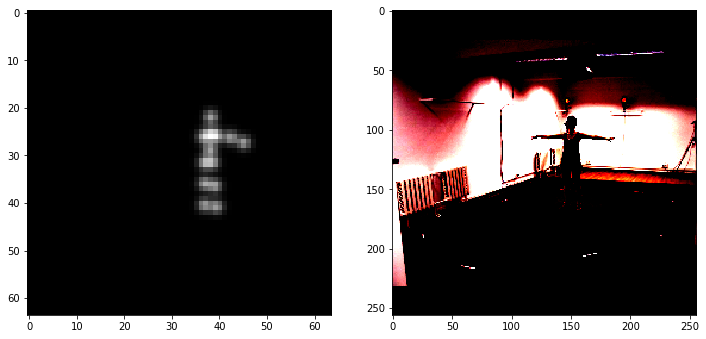

In [17]:
img, heatmaps, _ = dataset[9]

fig,ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(heatmaps.sum(axis=0), cmap='gray')
# ax[0].imshow(heatmaps[3], cmap='gray')
ax[1].imshow(img.permute(1,2,0).numpy());

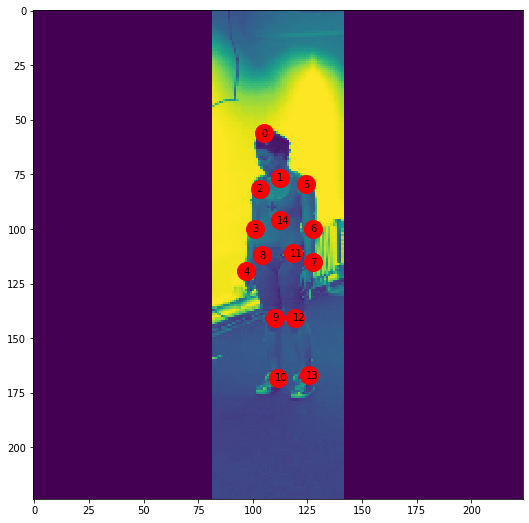

In [3]:
# 1237 - pretty nice ex
image, annot_2d = h36m[1237]

fig,ax = plt.subplots(1, figsize=(9,9))
plt.imshow(image.permute(1,2,0).mean(dim=2))

plt.plot(annot_2d[:,0], annot_2d[:,1], 'ro', markersize=18)
for i, joint in enumerate(annot_2d):
    
    plt.annotate(i, (float(joint[0]), float(joint[1])), 
                 xytext=(-3,-3), textcoords='offset points')


In [7]:
from dataset_loader import MPII
import torch as th

In [8]:
mpii = MPII(mode='val')

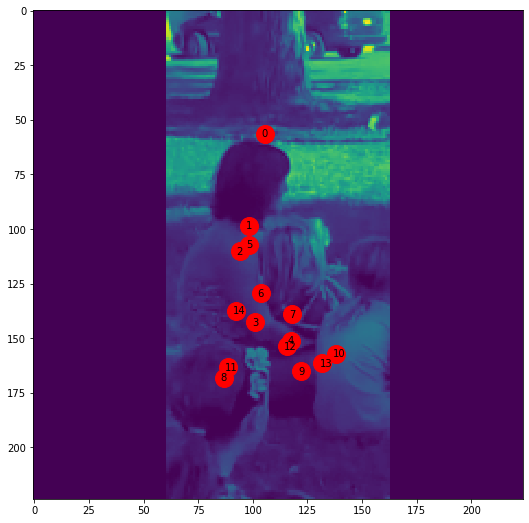

In [9]:
image, annot_2d, joints_valid = mpii[990]

joints_names = th.arange(15)[joints_valid]

fig,ax = plt.subplots(1, figsize=(9,9))
ax.imshow(image.permute(1,2,0).mean(dim=2))

ax.plot(annot_2d[:,0], annot_2d[:,1], 'ro', markersize=18)
for i, joint in enumerate(annot_2d):
    ax.annotate(str(int(joints_names[i])), (float(joint[0]), float(joint[1])), 
                xytext=(-3,-3), textcoords='offset points')


In [22]:
from dataset_loader import MPII, H36M

In [ ]:
from torch.utils.data import DataLoader

mpii1 = MPII(num_images=200)
data_loader1 = DataLoader(mpii1, batch_size=5, shuffle=False)

In [62]:
h36m = H36M(num_images=1000)
data_loader2 = DataLoader(h36m, batch_size=2, shuffle=False)

In [64]:
h36m[0][2]

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True])

In [52]:
counter = 0
for x, y in zip(data_loader1, data_loader2):
    print(x[0].size(), y[2].size())
    break
#     idx = 2
#     plt.imshow(x[0][idx].permute(1,2,0))
#     joints = x[1][idx][x[2][idx]]
#     plt.plot(joints[:,0], joints[:,1], 'r.')
#     plt.show()
#     counter += 1
    
#     if counter > 10:
#         break

torch.Size([5, 3, 224, 224]) torch.Size([2, 15])


In [66]:
th.tensor([0,0]).view(1,2)

tensor([[0, 0]])